In [3]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
df = pd.read_csv('data/cardio.csv',  sep= ';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
full_features = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
                 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
target = 'cardio'

In [6]:
df['age'] = round(df['age'] / 365)

In [7]:
X = df[full_features]  # Признаки
Y = df[target]  # Целевая переменная
tree = DecisionTreeClassifier(random_state=1)
tree.fit(X, Y)

DecisionTreeClassifier(random_state=1)

In [8]:
first_stage_questions = tree.tree_.node_count
print(f"Будет задано {first_stage_questions} вопросов.")

first_node_features = tree.tree_.n_features
print(f"Количество признаков в корне дерева: {first_node_features}")

Будет задано 46409 вопросов.
Количество признаков в корне дерева: 11


In [9]:
selected_features = ["weight", "gluc"]
data_subset = df[selected_features].head(10)
target_subset = df[target].head(10)

model_subset = DecisionTreeClassifier(random_state=42)
model_subset.fit(data_subset, target_subset)

DecisionTreeClassifier(random_state=42)

In [11]:
questions_2_features = model_subset.tree_.node_count
print(f"Будет задано {questions_2_features} вопросов.")

Будет задано 11 вопросов.


In [12]:
selected_features = ["weight", "gluc"]
data_subset = df[selected_features].head(10)
target_subset = df[target].head(10)

model_subset = DecisionTreeClassifier(random_state=1)
model_subset.fit(data_subset, target_subset)

DecisionTreeClassifier(random_state=1)

[Text(0.5, 0.875, 'weight <= 76.5\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.3, 0.625, 'weight <= 65.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.2, 0.375, 'weight <= 63.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.1, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7, 0.625, 'weight <= 89.0\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.6, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.375, 'gluc <= 2.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.7, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.9, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

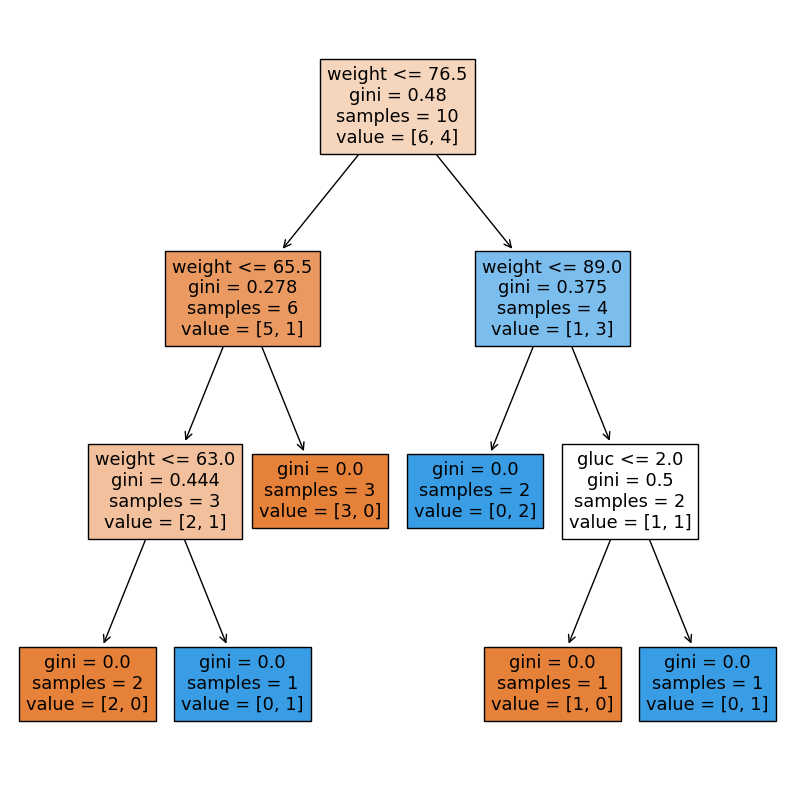

In [15]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 10))
plot_tree(model_subset, feature_names=selected_features, filled=True)

In [16]:
total_nodes = model_subset.tree_.node_count
print(f"Общее количество узлов в дереве решений: {total_nodes}")

Общее количество узлов в дереве решений: 11


In [17]:
num_leaves = model_subset.get_n_leaves()
print(f"Количество листов в обученном дереве решений: {num_leaves}")

Количество листов в обученном дереве решений: 6


In [18]:
from sklearn.metrics import accuracy_score

X_remaining = df[selected_features].iloc[10:]
y_remaining = df[target].iloc[10:]

y_pred_remaining = model_subset.predict(X_remaining)
accuracy_remaining = accuracy_score(y_remaining, y_pred_remaining)

print(f"Точность модели дерева решений на оставшихся данных: {accuracy_remaining:.2f}")

Точность модели дерева решений на оставшихся данных: 0.53


In [19]:
import numpy as np

def gini(target_values):
    total_samples = len(target_values)
    if total_samples == 0:
        return 0.0

    unique_classes, class_counts = np.unique(target_values, return_counts=True)
    class_probabilities = class_counts / total_samples

    gini = 1.0 - np.sum(class_probabilities ** 2)

    return gini

In [21]:
gini(df[target])

print(f"Критерий Джини в корне дерева решений: {gini(df[target]):.2f}")

Критерий Джини в корне дерева решений: 0.50


In [22]:
def information_gain(left_target, right_target, original_target):
    original_gini = gini(original_target)

    left_weight = len(left_target) / (len(left_target) + len(right_target))
    right_weight = len(right_target) / (len(left_target) + len(right_target))
    weighted_gini = (left_weight * gini(left_target)) + (right_weight * gini(right_target))

    gain = original_gini - weighted_gini

    return gain

In [23]:
import pandas as pd
import numpy as np

information_gains = pd.DataFrame(columns=['Feature', 'Split Value', 'Information Gain'])
original_target = df[target].values

for feature in full_features:
    unique_values = np.unique(df[feature].values)

    for value in unique_values:
        left_indices = df[feature] <= value
        right_indices = df[feature] > value

        left_target = original_target[left_indices]
        right_target = original_target[right_indices]

        gain = information_gain(left_target, right_target, original_target)

        result_df = pd.DataFrame({'Feature': [feature], 'Split Value': [value], 'Information Gain': [gain]})

        information_gains = pd.concat([information_gains, result_df], ignore_index=True)

print(information_gains)

C:\Users\prokh\AppData\Local\Temp\ipykernel_5004\2535076023.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  information_gains = pd.concat([information_gains, result_df], ignore_index=True)


    Feature  Split Value  Information Gain
0       age         30.0          0.000029
1       age         39.0          0.000926
2       age         40.0          0.006787
3       age         41.0          0.008039
4       age         42.0          0.011750
..      ...          ...               ...
743   smoke          1.0          0.000000
744    alco          0.0          0.000027
745    alco          1.0          0.000000
746  active          0.0          0.000636
747  active          1.0          0.000000

[748 rows x 3 columns]


In [25]:
information_gains_sorted = information_gains.sort_values(by='Information Gain', ascending=False)
best_question = information_gains_sorted.iloc[0]

print(f"Самый лучший вопрос:\n{best_question}")

Самый лучший вопрос:
Feature                ap_hi
Split Value            129.0
Information Gain    0.094549
Name: 482, dtype: object


In [26]:
best_feature = best_question['Feature']
split_value = best_question['Split Value']

df_left = df[df[best_feature] <= split_value]
df_right = df[df[best_feature] > split_value]

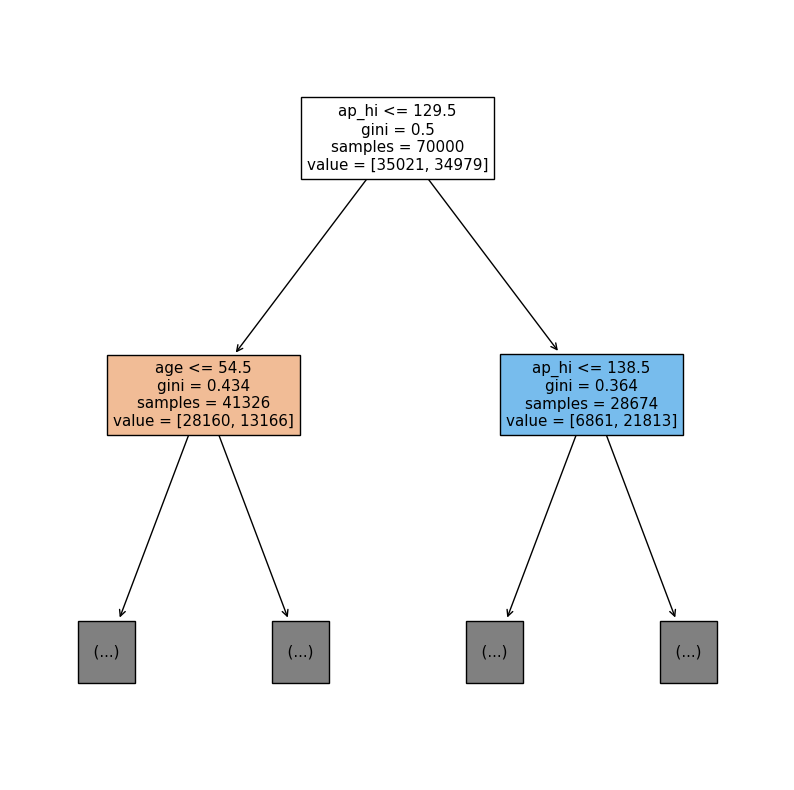

In [27]:
from sklearn.tree import plot_tree


plt.figure(figsize=(10, 10))
plot_tree(tree, feature_names=full_features, max_depth=1, filled=True)
plt.show()

In [28]:
information_gains_left = pd.DataFrame(columns=['Feature', 'Split Value', 'Information Gain'])
original_target = df_left[target].values

for feature in full_features:
    unique_values = np.unique(df_left[feature].values)

    for value in unique_values:
        left_indices = df_left[feature] <= value
        right_indices = df_left[feature] > value

        left_target = original_target[left_indices]
        right_target = original_target[right_indices]

        gain = information_gain(left_target, right_target, original_target)

        result_df = pd.DataFrame({'Feature': [feature], 'Split Value': [value], 'Information Gain': [gain]})

        information_gains_left = pd.concat([information_gains_left, result_df], ignore_index=True)

print(information_gains_left)

C:\Users\prokh\AppData\Local\Temp\ipykernel_5004\3134456239.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  information_gains_left = pd.concat([information_gains_left, result_df], ignore_index=True)


    Feature  Split Value  Information Gain
0       age         30.0          0.000020
1       age         39.0          0.000699
2       age         40.0          0.005390
3       age         41.0          0.006464
4       age         42.0          0.009373
..      ...          ...               ...
497   smoke          1.0          0.000000
498    alco          0.0          0.000462
499    alco          1.0          0.000000
500  active          0.0          0.001610
501  active          1.0          0.000000

[502 rows x 3 columns]


In [29]:
information_gains_right = pd.DataFrame(columns=['Feature', 'Split Value', 'Information Gain'])

original_target = df_right[target].values

for feature in full_features:
    unique_values = np.unique(df_right[feature].values)


    for value in unique_values:
        left_indices = df_right[feature] <= value
        right_indices = df_right[feature] > value

        left_target = original_target[left_indices]
        right_target = original_target[right_indices]

        gain = information_gain(left_target, right_target, original_target)

        result_df = pd.DataFrame({'Feature': [feature], 'Split Value': [value], 'Information Gain': [gain]})

        information_gains_right = pd.concat([information_gains_right, result_df], ignore_index=True)

print(information_gains_right)

C:\Users\prokh\AppData\Local\Temp\ipykernel_5004\1790112867.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  information_gains_right = pd.concat([information_gains_right, result_df], ignore_index=True)


    Feature  Split Value  Information Gain
0       age         39.0          0.000157
1       age         40.0          0.000288
2       age         41.0          0.000328
3       age         42.0          0.000338
4       age         43.0          0.000235
..      ...          ...               ...
562   smoke          1.0          0.000000
563    alco          0.0          0.000109
564    alco          1.0          0.000000
565  active          0.0          0.000026
566  active          1.0          0.000000

[567 rows x 3 columns]


In [31]:
information_gains_sorted_right = information_gains_right.sort_values(by='Information Gain', ascending=False)

best_question_right = information_gains_sorted_right.iloc[0]

print(f"Самый лучший вопрос (правый):\n{best_question_right}")

Самый лучший вопрос (правый):
Feature                ap_hi
Split Value            138.0
Information Gain    0.025114
Name: 341, dtype: object


In [32]:
information_gains_sorted_left = information_gains_left.sort_values(by='Information Gain', ascending=False)

best_question_left = information_gains_sorted_left.iloc[0]

print(f"Самый лучший вопрос (левый):\n{best_question_left}")

Самый лучший вопрос (левый):
Feature                  age
Split Value             54.0
Information Gain    0.020176
Name: 16, dtype: object


In [33]:
best_feature_left = best_question_left['Feature']
split_value_left = best_question_left['Split Value']

best_feature_right = best_question_right['Feature']
split_value_right = best_question_right['Split Value']


df_left = df[df[best_feature_left] <= split_value_left]
df_right = df[df[best_feature_right] <= split_value_right]

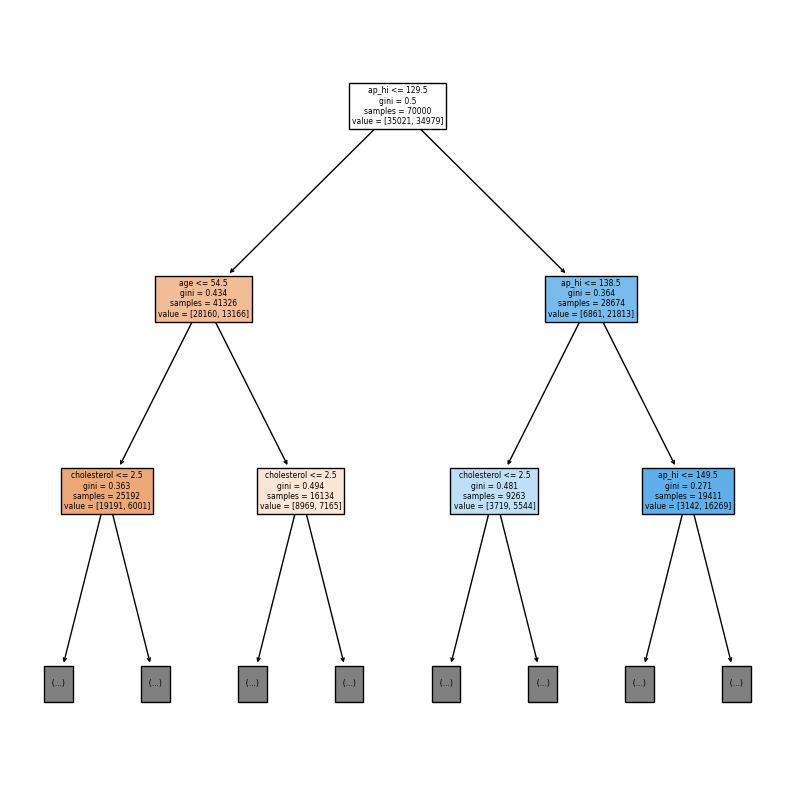

In [34]:
plt.figure(figsize=(10, 10))
plot_tree(tree, feature_names=full_features, max_depth=2, filled=True)
plt.show()

In [35]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [37]:
X = data.data
features = data.feature_names
y = data.target

In [38]:
df = pd.DataFrame(X, columns=features)
df['target'] = y

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[features],
    df['target'],
    test_size=0.2,
    shuffle=True,
    random_state=3
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((353, 10), (353,), (89, 10), (89,))

In [40]:
from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(random_state=42)
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [41]:
y_train_pred = reg_tree.predict(X_train)
y_test_pred = reg_tree.predict(X_test)

In [42]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("MSE (обучение):", mse_train)
print("MSE (тест):", mse_test)

from sklearn.metrics import r2_score

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("R2 (обучение):", r2_train)
print("R2 (тест):", r2_test)

MSE (обучение): 0.0
MSE (тест): 5929.685393258427
R2 (обучение): 1.0
R2 (тест): -0.09510918464525231


In [43]:
reg_tree = DecisionTreeRegressor(criterion="poisson", max_depth=8, min_samples_leaf=40, random_state=1)
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=8, min_samples_leaf=40,
                      random_state=1)

In [44]:
y_train_pred = reg_tree.predict(X_train)
y_test_pred = reg_tree.predict(X_test)

from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("MSE (обучение):", mse_train)
print("MSE (тест):", mse_test)

from sklearn.metrics import r2_score

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("R2 (обучение):", r2_train)
print("R2 (тест):", r2_test)

MSE (обучение): 3167.7977287363933
MSE (тест): 3214.9311195147966
R2 (обучение): 0.4763639240819252
R2 (тест): 0.4062584499027134


In [45]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100_000, n_features=20, n_informative=12, random_state=10)

In [46]:
X.shape, y.shape

((100000, 20), (100000,))

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    shuffle=True,
    random_state=3
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80000, 20), (80000,), (20000, 20), (20000,))

In [49]:
from sklearn.tree import DecisionTreeRegressor
reg_tree = DecisionTreeRegressor(criterion="squared_error", max_depth=5, min_samples_leaf=2, random_state=42)
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=2, random_state=42)

In [50]:
y_train_pred = reg_tree.predict(X_train)
y_test_pred = reg_tree.predict(X_test)

from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("MSE (обучение):", mse_train)
print("MSE (тест):", mse_test)

from sklearn.metrics import r2_score

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("R2 (обучение):", r2_train)
print("R2 (тест):", r2_test)

MSE (обучение): 27785.177141947202
MSE (тест): 28404.350366594077
R2 (обучение): 0.4859082392067524
R2 (тест): 0.4738762029658744


In [51]:
print("Как видно из метрики R2 модель работает лучше чем просто подсчет среднего")

Как видно из метрики R2 модель работает лучше чем просто подсчет среднего


In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=42)

param_grid = {
    "criterion": ["squared_error", "friedman_mse"],
    "max_depth": [2, 5, 10],
    "min_samples_leaf":  [2, 5, 10]
}

grid = GridSearchCV(tree, param_grid, cv=5, verbose=1)

grid_search = grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [53]:
grid_search.best_params_

{'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 10}

In [54]:
tree = grid_search.best_estimator_
y_pred_best = tree.predict(X_test)

In [55]:
from sklearn.metrics import mean_squared_error, r2_score

print(f'MSE={mean_squared_error(y_pred_best, y_test)}')
print(f'R2={r2_score(y_pred_best, y_test)}')

MSE=17128.390185141296
R2=0.5780001138008368
